In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [29]:

# Fungsi untuk membaca data dari file teks
def read_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(', ')
            iter_num = int(parts[0].split(': ')[1])
            loss = float(parts[1].split(': ')[1])
            content_loss = None
            style_loss = None

            for part in parts[2:]:
                if 'content_loss' in part:
                    content_loss = float(part.split(': ')[1])
                elif 'style_loss' in part:
                    style_loss = float(part.split(': ')[1])
            
            data.append((iter_num, loss, content_loss, style_loss))
    return pd.DataFrame(data, columns=['iter', 'loss', 'content_loss', 'style_loss'])


file_name = "pusgiwa-wave-5000-arbit-loss"
# Membaca data dari file
file_path = f"{file_name}.txt"  # Ganti dengan path ke file teks Anda
df = read_data(file_path)

train_data = df.dropna()
test_data = df[df.isna().any(axis=1)]

# Menyiapkan input (X) dan output (y) untuk data latih
X_train = train_data['loss'].values.reshape(-1, 1)
y_train = train_data[['content_loss', 'style_loss']].values


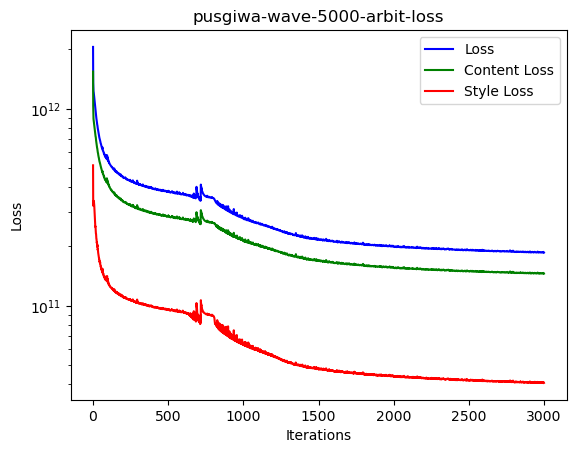

In [30]:
plt.plot(train_data['iter'], train_data['loss'], label='Loss', color='blue')

# Plot content_loss
plt.plot(train_data['iter'], train_data['content_loss'], label='Content Loss', color='green')

# Plot style_loss
plt.plot(train_data['iter'], train_data['style_loss'], label='Style Loss', color='red')
plt.yscale('log')
# Menambahkan judul dan label sumbu
plt.title(f'{file_name}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

In [3]:

# Membangun model neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(2)  # Output layer dengan 2 neuron, masing-masing untuk content_loss dan style_loss
])

# Kompilasi model
model.compile(optimizer='adam', loss='mse')


Epoch 1/100
440/440 [==============================] - 1s 975us/step - loss: 3047657832448.0000
Epoch 2/100
440/440 [==============================] - 1s 1ms/step - loss: 184373149696.0000
Epoch 3/100
440/440 [==============================] - 0s 1ms/step - loss: 25467578.0000
Epoch 4/100
440/440 [==============================] - 1s 1ms/step - loss: 24841886.0000
Epoch 5/100
440/440 [==============================] - 1s 1ms/step - loss: 24875812.0000
Epoch 6/100
440/440 [==============================] - 1s 1ms/step - loss: 24974002.0000
Epoch 7/100
440/440 [==============================] - 1s 1ms/step - loss: 24936720.0000
Epoch 8/100
440/440 [==============================] - 1s 1ms/step - loss: 24980122.0000
Epoch 9/100
440/440 [==============================] - 0s 1ms/step - loss: 25009210.0000
Epoch 10/100
440/440 [==============================] - 0s 1ms/step - loss: 25236000.0000
Epoch 11/100
440/440 [==============================] - 1s 1ms/step - loss: 25668686.0000
Epoch 12

In [30]:

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=4)


Epoch 1/100
389/389 [==============================] - 1s 3ms/step - loss: 270299360.0000
Epoch 2/100
389/389 [==============================] - 1s 3ms/step - loss: 715551.3750
Epoch 3/100
389/389 [==============================] - 1s 3ms/step - loss: 717997.2500
Epoch 4/100
389/389 [==============================] - 1s 2ms/step - loss: 722881.9375
Epoch 5/100
389/389 [==============================] - 1s 3ms/step - loss: 728208.5625
Epoch 6/100
389/389 [==============================] - 1s 3ms/step - loss: 724355.6250
Epoch 7/100
389/389 [==============================] - 1s 4ms/step - loss: 738073.6875
Epoch 8/100
389/389 [==============================] - 1s 3ms/step - loss: 735359.1875
Epoch 9/100
389/389 [==============================] - 1s 3ms/step - loss: 747038.4375
Epoch 10/100
389/389 [==============================] - 1s 3ms/step - loss: 762008.6250
Epoch 11/100
389/389 [==============================] - 1s 3ms/step - loss: 771821.4375
Epoch 12/100
389/389 [================

In [4]:
test_loss = test_data.loc[1]['loss']

In [37]:
predictions = model.predict(test_data['loss'])

test_data['content_loss'] = predictions[:, 0]
test_data['style_loss'] = predictions[:, 1]



# # Fungsi untuk memprediksi content_loss dan style_loss berdasarkan nilai loss yang diberikan
# def predict_losses(model, given_loss):
#     given_loss = np.array([[given_loss]])
#     predicted_losses = model.predict(given_loss)
#     return predicted_losses[0][0], predicted_losses[0][1]

# # Menggunakan model untuk memprediksi data uji
# test_data['predicted_content_loss'] = np.nan
# test_data['predicted_style_loss'] = np.nan

# for idx, row in test_data.iterrows():
#     predicted_content_loss, predicted_style_loss = predict_losses(model, row['loss'])
#     test_data.at[idx, 'predicted_content_loss'] = predicted_content_loss
#     test_data.at[idx, 'predicted_style_loss'] = predicted_style_loss

# print(test_data)


157/157 [==============================] - 0s 2ms/step


In [38]:
output_file_path = 'predicted_data.txt'
with open(output_file_path, 'w') as file:
    for idx, row in test_data.iterrows():
        file.write(f"iter: {idx+1}, loss: {row['loss']:.6f}, content_loss: {row['content_loss']:.6f}, style_loss: {row['style_loss']:.6f}\n")

In [6]:
test_data

,iter,loss,content_loss,style_loss
0,1,368658.750000,2.799537e+08,1.806742e+07
1,2,368113.437500,2.795396e+08,1.804070e+07
2,3,367431.343750,2.790217e+08,1.800727e+07
3,4,366551.062500,2.783532e+08,1.796413e+07
4,5,365429.125000,2.775012e+08,1.790914e+07
...,...,...,...,...
1903,1904,3861.178223,2.933290e+06,1.893056e+05
1904,1905,3860.637695,2.932880e+06,1.892791e+05
1905,1906,3860.071533,2.932450e+06,1.892514e+05
1906,1907,3859.535645,2.932042e+06,1.892251e+05
